In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ACER/Downloads/product/product_data0.csv")
for i in range(1,25):
    try:
        df2=pd.read_csv("C:/Users/ACER/Downloads/product/product_data{}.csv".format(i))
        df = pd.concat([df, df2], axis=0)
    except:
        continue
df.to_csv("C:/Users/ACER/Downloads/data_demo.csv",index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 110
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2790 non-null   float64
 1   sku                      2790 non-null   float64
 2   short_description        2790 non-null   object 
 3   price                    2790 non-null   float64
 4   list_price               2790 non-null   float64
 5   price_usd                0 non-null      float64
 6   discount                 2790 non-null   float64
 7   discount_rate            2790 non-null   float64
 8   review_count             2790 non-null   float64
 9   order_count              0 non-null      float64
 10  inventory_status         2790 non-null   object 
 11  is_visible               0 non-null      float64
 12  stock_item_qty           2790 non-null   float64
 13  stock_item_max_sale_qty  2790 non-null   float64
 14  product_name             

In [4]:
df=df.drop(['short_description','price_usd','order_count','inventory_status','is_visible','stock_item_qty','stock_item_max_sale_qty','product_name'],axis=1)
df

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
0,435870.0,8.006427e+12,808000.0,954556.0,146556.0,15.0,808.0,145924.0,Ensure,28546.0,4.8,do-choi-me-be,2549
1,57044926.0,3.629907e+12,919000.0,1078000.0,159000.0,15.0,302.0,149737.0,Pediasure,2764.0,5.0,do-choi-me-be,2549
2,24030105.0,5.781212e+12,599000.0,733282.0,134282.0,18.0,528.0,149737.0,Pediasure,8055.0,4.8,do-choi-me-be,2549
3,24028050.0,9.863682e+12,1005000.0,1238569.0,233569.0,19.0,716.0,149737.0,Pediasure,12707.0,4.8,do-choi-me-be,2549
4,24026125.0,2.973806e+12,1239000.0,1426944.0,187944.0,13.0,257.0,149741.0,Glucerna,2837.0,5.0,do-choi-me-be,2549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,213710314.0,4.601854e+12,1019000.0,1019000.0,0.0,0.0,1.0,27464.0,TP-Link,1.0,5.0,may-anh,1801
107,199532725.0,6.558414e+12,1350000.0,2000000.0,650000.0,33.0,11.0,545395.0,ASPORT,31.0,4.5,may-anh,1801
108,195864060.0,5.237590e+12,2000000.0,2000000.0,0.0,0.0,43.0,228755.0,Andbon,205.0,4.8,may-anh,1801
109,68454398.0,3.292439e+12,129999.0,129999.0,0.0,0.0,11.0,193617.0,VSGO,31.0,4.6,may-anh,1801


# Tính doanh thu theo từng sản phẩm 

In [5]:
df['revenue']=df['price']*df['quantity_sold']-df['discount']

In [6]:
df.describe()

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,quantity_sold,rating_average,revenue
count,2.790000e+03,2.790000e+03,2.790000e+03,2.790000e+03,2.790000e+03,2790.000000,2790.000000,2.790000e+03,2790.000000,2790.000000,2.790000e+03
mean,1.212932e+08,5.477860e+12,6.643494e+05,8.391714e+05,1.748220e+05,14.543728,127.037634,8.486860e+05,966.222222,4.462545,3.946366e+08
std,7.062958e+07,2.609414e+12,2.438186e+06,2.914660e+06,7.634445e+05,18.161916,362.084557,1.764802e+06,4178.606295,1.001536,2.182620e+09
min,1.809120e+05,1.012204e+12,2.000000e+03,2.000000e+03,0.000000e+00,0.000000,0.000000,1.782500e+04,1.000000,0.000000,-2.900000e+04
25%,6.133695e+07,3.248999e+12,9.200000e+04,1.000000e+05,0.000000e+00,0.000000,3.000000,1.114610e+05,11.000000,4.500000,1.973250e+06
50%,1.182242e+08,5.359947e+12,1.810000e+05,2.200000e+05,6.714500e+03,5.000000,17.000000,1.114610e+05,73.000000,4.700000,1.419550e+07
75%,1.863082e+08,7.733732e+12,4.050000e+05,5.057500e+05,9.100000e+04,28.000000,88.000000,3.689340e+05,447.000000,5.000000,1.046685e+08
max,2.619827e+08,9.984525e+12,5.600000e+07,5.600000e+07,1.300000e+07,92.000000,6739.000000,8.140035e+06,127617.000000,5.000000,5.214761e+10


<AxesSubplot:>

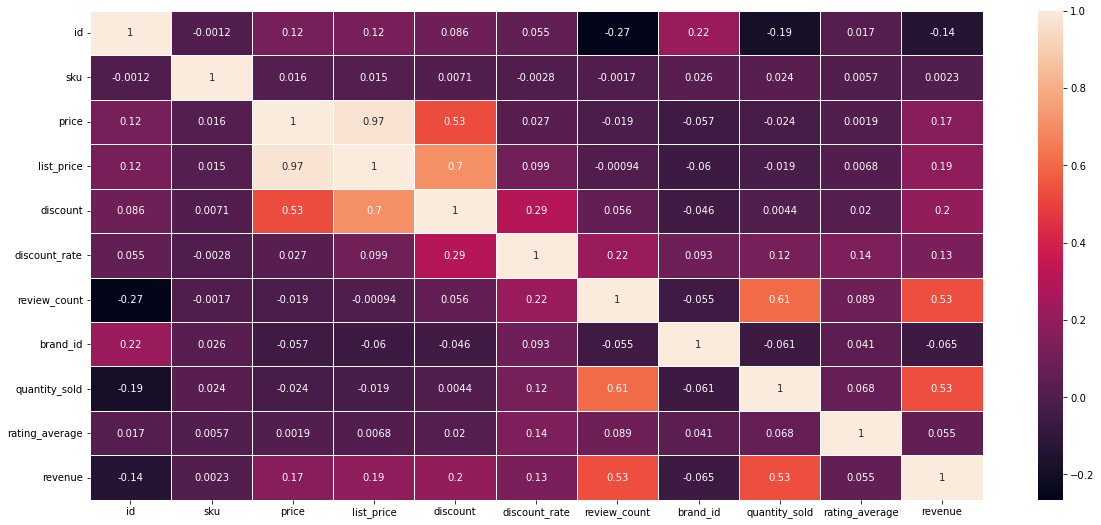

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,9))    
sns.heatmap(corr, annot=True, linewidths=.5)

In [8]:
def univariate_cont_analysis(var,df):
    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()
    max_val = df[var].max()
    min_val = df[var].min()
    range_val = np.ptp(df[var])
    variance = df[var].var()
    skewness = df[var].skew()
    result = [mean,median,mode,max_val,min_val,range_val,variance,skewness]
    return result

result_list=[]
num_vars = ['price','list_price','discount','discount_rate','review_count','quantity_sold','rating_average','revenue']

for var in num_vars:
    result = univariate_cont_analysis(var,df)
    result_list.append(result)
df_result = pd.DataFrame(result_list,columns=['mean','median','mode','max_val','min_val','range_val','variance','skewness'], index=num_vars)

pd.options.display.max_colwidth = 100
df_result

,mean,median,mode,max_val,min_val,range_val,variance,skewness
price,6.643494e+05,181000.0,"0 99000.0 Name: price, dtype: float64",5.600000e+07,2000.0,5.599800e+07,5.944751e+12,11.283132
list_price,8.391714e+05,220000.0,"0 199000.0 Name: list_price, dtype: float64",5.600000e+07,2000.0,5.599800e+07,8.495241e+12,9.526310
discount,1.748220e+05,6714.5,"0 0.0 Name: discount, dtype: float64",1.300000e+07,0.0,1.300000e+07,5.828475e+11,10.503382
discount_rate,1.454373e+01,5.0,"0 0.0 Name: discount_rate, dtype: float64",9.200000e+01,0.0,9.200000e+01,3.298552e+02,1.028876
review_count,1.270376e+02,17.0,"0 1.0 Name: review_count, dtype: float64",6.739000e+03,0.0,6.739000e+03,1.311052e+05,8.046525
quantity_sold,9.662222e+02,73.0,"0 1.0 Name: quantity_sold, dtype: float64",1.276170e+05,1.0,1.276160e+05,1.746075e+07,16.490937
rating_average,4.462545e+00,4.7,"0 5.0 Name: rating_average, dtype: float64",5.000000e+00,0.0,5.000000e+00,1.003075e+00,-3.493833
revenue,3.946366e+08,14195500.0,"0 0.0 Name: revenue, dtype: float64",5.214761e+10,-29000.0,5.214764e+10,4.763830e+18,14.894165


C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

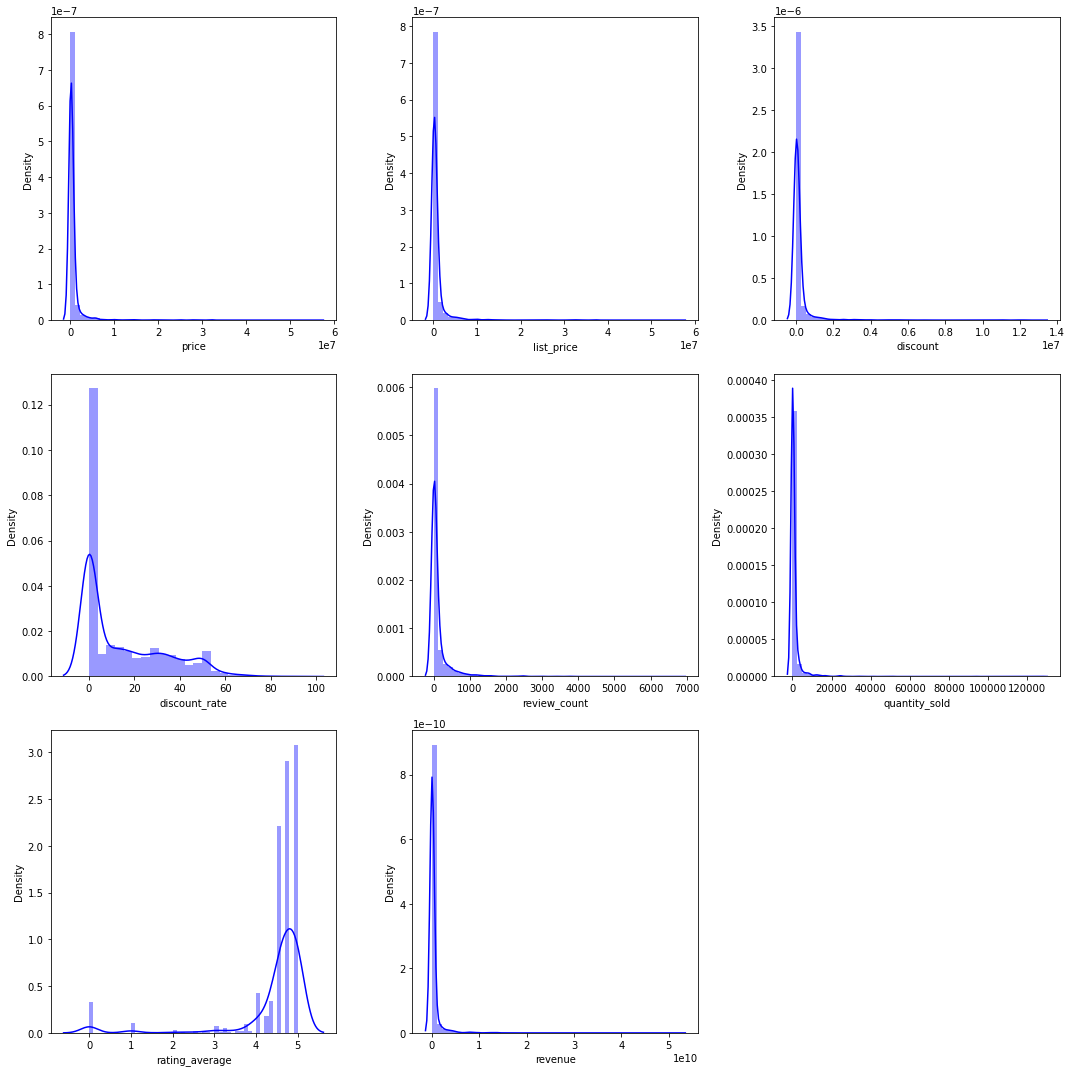

In [9]:
def visualize_histogram(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range(1,len(cont_var)+1):
        plt.subplot(n,3,i)
        sns.distplot(df[cont_var[i-1]].dropna(), color = 'Blue')
    plt.tight_layout()
    plt.show()

visualize_histogram(num_vars, df)

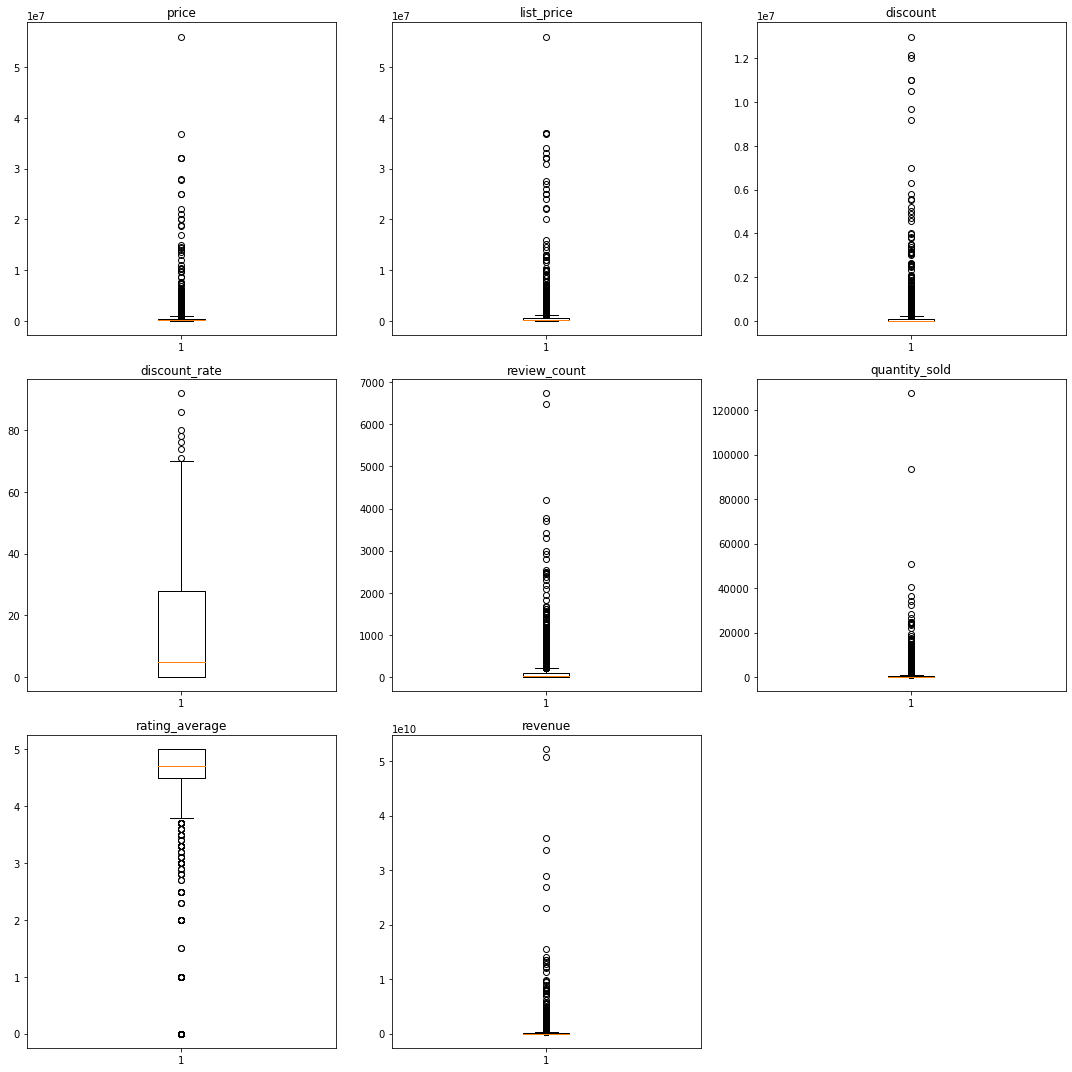

In [10]:
def visualize_boxplot(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range (1,len(cont_var)+1):
        plt.subplot(n,3,i)
        plt.boxplot(df[cont_var[i-1]].dropna())
        plt.title(cont_var[i-1])
    plt.tight_layout()
    plt.show()

visualize_boxplot(num_vars, df)

In [11]:
import scipy
def drop_outliers(num_vars, df):
    for num_var in num_vars:
        upper_limit= np.quantile(df[num_var],0.75) + 1.5*scipy.stats.iqr(df[num_var])
        lower_limit= np.quantile(df[num_var],0.25) - 1.5*scipy.stats.iqr(df[num_var])
        df = df[ (df[num_var]>=lower_limit) & (df[num_var]<=upper_limit)]
    return df
df = drop_outliers(num_vars, df).reset_index(drop=True)

# Sau khi xóa outliers

C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

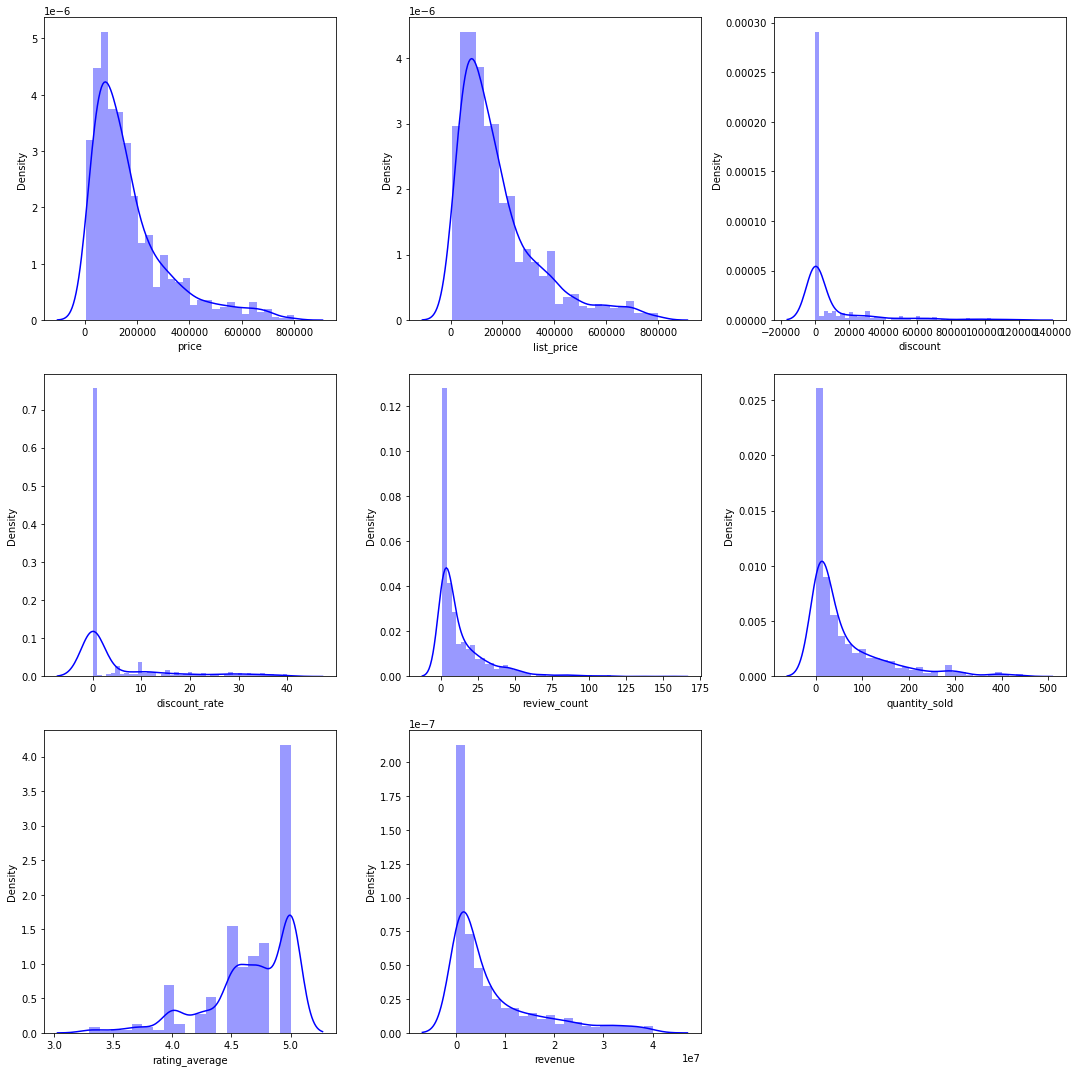

In [12]:
def visualize_histogram(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range(1,len(cont_var)+1):
        plt.subplot(n,3,i)
        sns.distplot(df[cont_var[i-1]].dropna(), color = 'Blue')
    plt.tight_layout()
    plt.show()

visualize_histogram(num_vars, df)

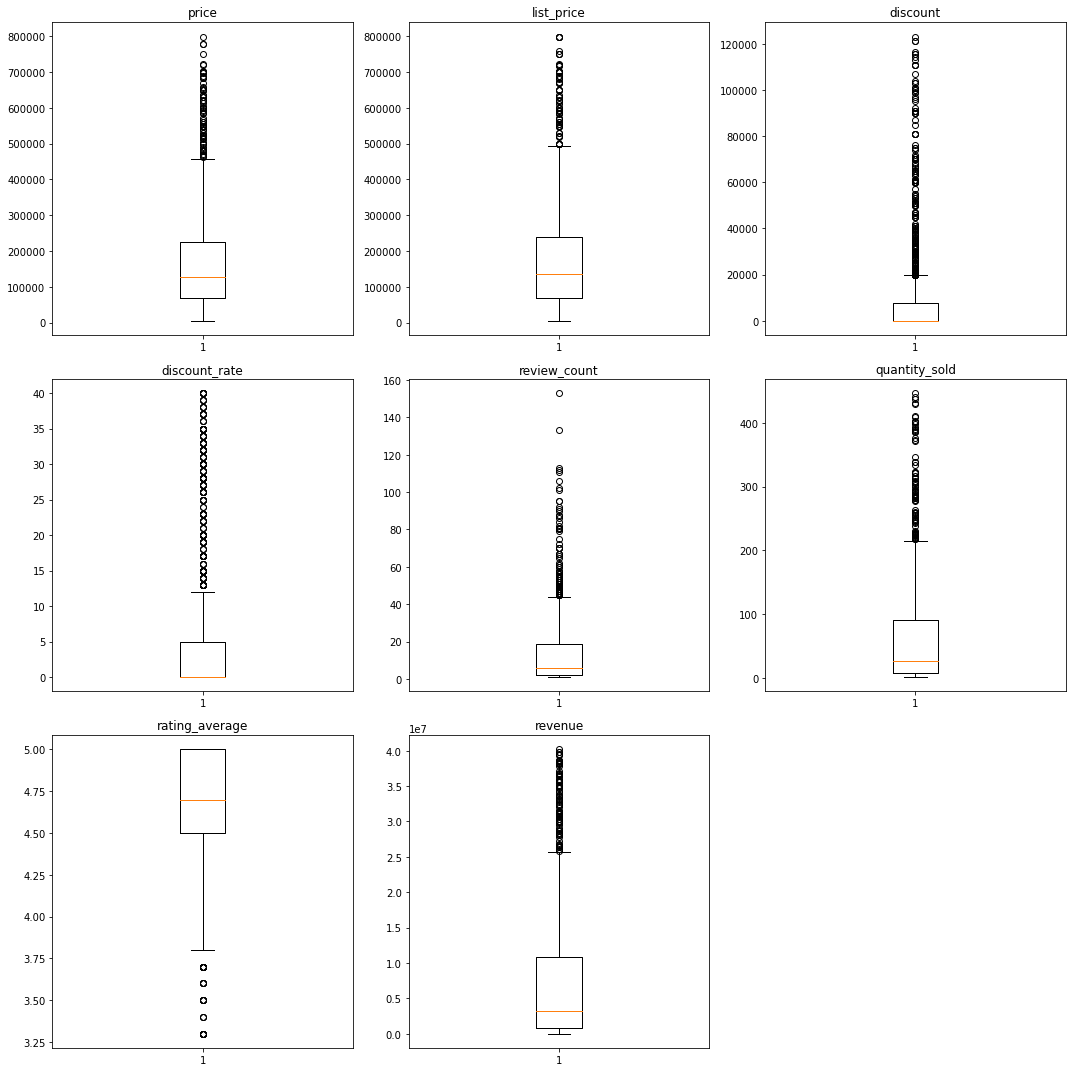

In [13]:
def visualize_boxplot(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range (1,len(cont_var)+1):
        plt.subplot(n,3,i)
        plt.boxplot(df[cont_var[i-1]].dropna())
        plt.title(cont_var[i-1])
    plt.tight_layout()
    plt.show()

visualize_boxplot(num_vars, df)

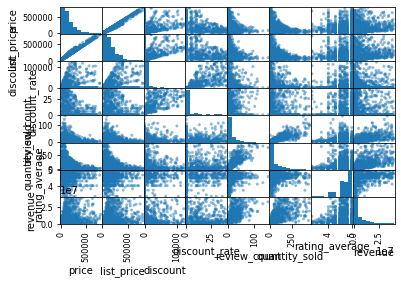

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[num_vars])
plt.show()

# Trực quan hóa giá bán và giá niêm yết

In [15]:
x=df.sort_values(by='price',ascending=False).head(10)
x

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id,revenue
816,105768569.0,3.149222e+12,799000.0,799000.0,0.0,0.0,2.0,48191.0,TOTOLINK,18.0,5.0,laptop-may-vi-tinh-linh-kien,1846,14382000.0
579,145748036.0,4.217579e+12,779000.0,799000.0,20000.0,3.0,9.0,841705.0,SAIGIO,14.0,4.7,tui-thoi-trang-nam,27616,10886000.0
562,146618296.0,9.760963e+12,778000.0,799000.0,21000.0,3.0,1.0,841705.0,SAIGIO,10.0,5.0,tui-thoi-trang-nam,27616,7759000.0
893,197538031.0,7.423113e+12,750000.0,750000.0,0.0,0.0,2.0,7519055.0,Cherelle Beauty,9.0,5.0,cross-border-hang-quoc-te,17166,6750000.0
862,50993584.0,2.420150e+12,722000.0,722000.0,0.0,0.0,5.0,307609.0,Neutrogena,12.0,5.0,cross-border-hang-quoc-te,17166,8664000.0
616,74893788.0,7.437697e+12,720000.0,720000.0,0.0,0.0,2.0,45773.0,Lata,7.0,4.0,tui-thoi-trang-nam,27616,5040000.0
871,177137986.0,3.754840e+12,702000.0,702000.0,0.0,0.0,1.0,111461.0,OEM,1.0,5.0,cross-border-hang-quoc-te,17166,702000.0
1182,188554003.0,4.945651e+12,700000.0,700000.0,0.0,0.0,2.0,111461.0,OEM,18.0,4.5,may-anh,1801,12600000.0
248,205506848.0,4.775822e+12,699999.0,699999.0,0.0,0.0,1.0,111461.0,OEM,1.0,5.0,thoi-trang-nam,915,699999.0
754,246932003.0,3.806826e+12,699000.0,699000.0,0.0,0.0,2.0,46363.0,Julius,2.0,5.0,dong-ho-va-trang-suc,8371,1398000.0


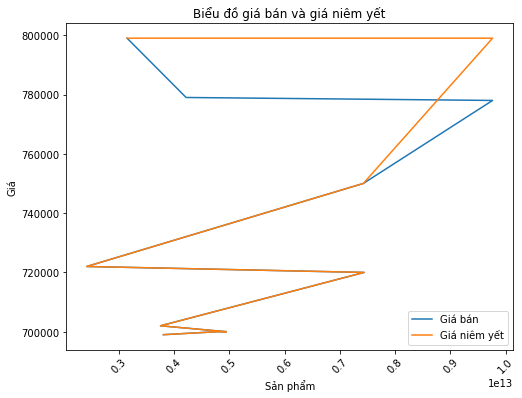

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x['sku'], x['price'], label='Giá bán')
plt.plot(x['sku'], x['list_price'], label='Giá niêm yết')
plt.xlabel('Sản phẩm')
plt.ylabel('Giá')
plt.title('Biểu đồ giá bán và giá niêm yết')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# So sánh số lượng của các loại sản phầm

Text(0.5, 1.0, 'Number of category type')

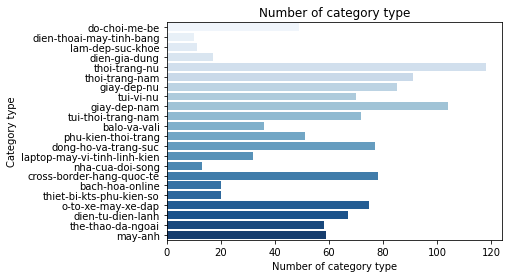

In [17]:
sns.countplot(data=df,y='category_type', palette='Blues')
plt.xlabel('Number of category type')
plt.ylabel('Category type')
plt.title('Number of category type')

# Thông tin các loại sản phẩm có tỉ lệ giảm giá cao nhất

In [18]:
x=df.sort_values(by='discount_rate',ascending=False).head(10)
x

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id,revenue
722,200696569.0,8.782107e+12,108000.0,180000.0,72000.0,40.0,3.0,4672141.0,TQJ,8.0,5.0,dong-ho-va-trang-suc,8371,792000.0
132,146635392.0,1.397130e+12,137000.0,229000.0,92000.0,40.0,13.0,111461.0,OEM,39.0,4.5,thoi-trang-nu,931,5251000.0
1109,13849819.0,6.082752e+12,45000.0,75000.0,30000.0,40.0,36.0,111461.0,OEM,128.0,4.6,the-thao-da-ngoai,1975,5730000.0
471,253059954.0,4.423568e+12,12000.0,20000.0,8000.0,40.0,42.0,4995383.0,Ximo,322.0,5.0,giay-dep-nam,1686,3856000.0
446,26089569.0,5.482712e+12,102000.0,170000.0,68000.0,40.0,7.0,7520871.0,mirrortowers MT,56.0,5.0,tui-vi-nu,976,5644000.0
518,261982674.0,5.651820e+12,15000.0,25000.0,10000.0,40.0,2.0,111461.0,OEM,4.0,5.0,giay-dep-nam,1686,50000.0
883,73611453.0,9.746540e+12,170000.0,284400.0,114400.0,40.0,3.0,25422.0,Xiaomi,17.0,5.0,cross-border-hang-quoc-te,17166,2775600.0
509,107801396.0,4.860567e+12,55000.0,90000.0,35000.0,39.0,44.0,4995383.0,Ximo,286.0,4.5,giay-dep-nam,1686,15695000.0
488,107801698.0,6.197812e+12,55000.0,90000.0,35000.0,39.0,6.0,4995383.0,Ximo,59.0,4.8,giay-dep-nam,1686,3210000.0
1152,192563036.0,3.712881e+12,58000.0,95000.0,37000.0,39.0,27.0,4187535.0,kunosport,108.0,4.7,the-thao-da-ngoai,1975,6227000.0


Text(0.5, 1.0, 'Price and discount by ID')

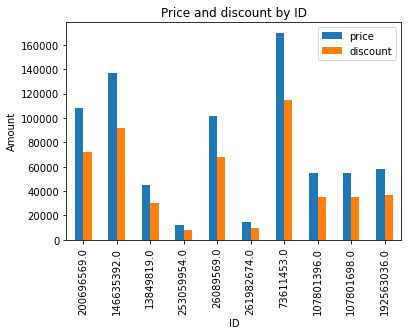

In [19]:
x[['id','price','discount']].plot(x='id',kind='bar')
plt.xlabel('ID')
plt.ylabel('Amount')
plt.title('Price and discount by ID')

# Thông tin các sản phẩm được review nhiều nhất

In [20]:
x=df.sort_values(by='review_count',ascending=False).head(5)
x

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id,revenue
211,72513159.0,4.900776e+12,90000.0,90000.0,0.0,0.0,153.0,111461.0,OEM,373.0,4.6,thoi-trang-nam,915,33570000.0
1023,2850247.0,4.973779e+12,77000.0,77000.0,0.0,0.0,133.0,111461.0,OEM,399.0,4.2,o-to-xe-may-xe-dap,8594,30723000.0
223,97057130.0,8.208159e+12,50000.0,79000.0,29000.0,37.0,113.0,4439117.0,BẢO BẢO STORE,372.0,4.6,thoi-trang-nam,915,18571000.0
1007,34623929.0,5.243945e+12,46000.0,46000.0,0.0,0.0,112.0,508907.0,BẢO LONG RACING,409.0,4.1,o-to-xe-may-xe-dap,8594,18814000.0
205,50347611.0,8.829611e+12,89000.0,130000.0,41000.0,32.0,111.0,224521.0,Doka,386.0,4.5,thoi-trang-nam,915,34313000.0


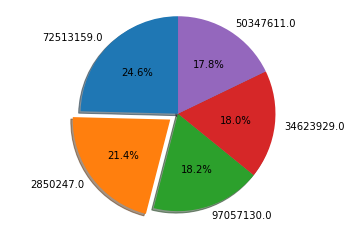

In [21]:
labels = x['id']
sizes = x['review_count']
explode = (0, 0.1, 0, 0,0)  
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('')

plt.show()

# Nhãn hiệu có doanh thu cao nhất

In [22]:
x=df.groupby(['brand_name']).max()['revenue'].sort_values(ascending=False).head(20)
x

brand_name
OEM                    40188000.0
Lix                    39858000.0
Huggies                39810800.0
UNO                    39515000.0
Canvas                 39468000.0
Tâm Minh Foods         39432000.0
Brother                38735000.0
Vie                    38610000.0
WD-40                  38610000.0
Laceva                 38556000.0
Highlands Coffee       38256000.0
Baw                    38243000.0
OLIKA                  38130000.0
KitAcoom               38093001.0
YOGA QG                36725000.0
Protec                 36496000.0
SENKO                  35856000.0
Yesido Just For You    35700000.0
\tOEM                  35621000.0
Lê Sang                35536500.0
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Top 20 Brand name by revenue')

C:\Users\ACER\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


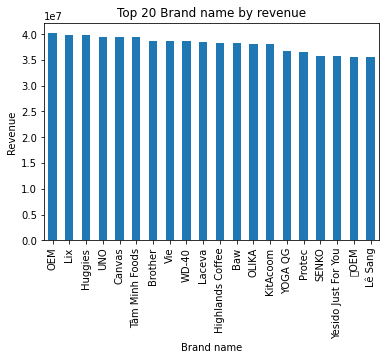

In [23]:
x.plot(kind='bar')
plt.xlabel('Brand name')
plt.ylabel('Revenue')
plt.title('Top 20 Brand name by revenue')

# Giá của sản phẩm có giá thành cao nhất của các nhãn hiệu

In [24]:
x=df.groupby(['brand_name']).max()['price'].sort_values(ascending=False).head(10)
x

brand_name
TOTOLINK           799000.0
SAIGIO             779000.0
Cherelle Beauty    750000.0
Neutrogena         722000.0
Lata               720000.0
OEM                702000.0
Julius             699000.0
Bejo               699000.0
Forme              696000.0
Spring Leaf        690000.0
Name: price, dtype: float64

Text(0.5, 1.0, 'Top 10 Brand name by Price')

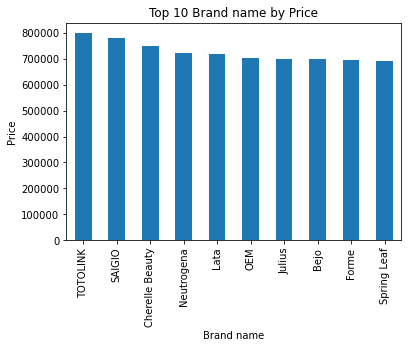

In [25]:
x.plot(kind='bar')
plt.xlabel('Brand name')
plt.ylabel('Price')
plt.title('Top 10 Brand name by Price')

# Nhãn hiệu có số lượng sản phẩm bán ra được nhiều nhất

In [26]:
x=df.groupby(['brand_name']).sum()['quantity_sold'].sort_values(ascending=False).head(10)
x

brand_name
OEM         35375.0
Ximo         1824.0
\tOEM        1311.0
Sunlight     1252.0
Baw           999.0
dododios      886.0
NAVIVU        668.0
Huggies       616.0
Doka          582.0
FuNu          563.0
Name: quantity_sold, dtype: float64

Text(0.5, 1.0, 'Top 10 brand name by quantity sold')

C:\Users\ACER\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


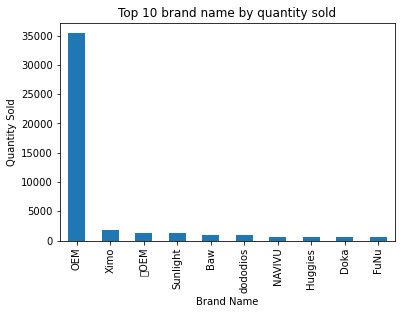

In [27]:
x.plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('Quantity Sold')
plt.title('Top 10 brand name by quantity sold')

# Nhãn hiệu được đánh giá tốt nhất bởi khách hàng

In [28]:
df.groupby(['brand_name']).mean()['rating_average'].sort_values(ascending=False)

brand_name
Protec           5.0
WILLIAM WEIR     5.0
Forme            5.0
Forever Young    5.0
Flamingo         5.0
                ... 
Nikita           3.7
Ekokemika        3.7
SITAKI           3.6
Nokia            3.3
Lenovo           3.3
Name: rating_average, Length: 294, dtype: float64

# Loại hàng hóa đem về doanh thu cao nhất

In [29]:
x=df.groupby(['category_type']).sum()['revenue'].sort_values(ascending=False)
x

category_type
o-to-xe-may-xe-dap              774483875.0
giay-dep-nam                    762180412.0
do-choi-me-be                   680959870.0
may-anh                         668443722.0
thoi-trang-nu                   618144310.0
thoi-trang-nam                  573661227.0
the-thao-da-ngoai               563844439.0
laptop-may-vi-tinh-linh-kien    503390528.0
tui-thoi-trang-nam              490358451.0
dong-ho-va-trang-suc            453387906.0
balo-va-vali                    388379745.0
giay-dep-nu                     364940633.0
bach-hoa-online                 354726500.0
thiet-bi-kts-phu-kien-so        349526121.0
dien-gia-dung                   348736340.0
phu-kien-thoi-trang             306623300.0
dien-tu-dien-lanh               295312900.0
nha-cua-doi-song                161644526.0
lam-dep-suc-khoe                159420900.0
tui-vi-nu                       148787729.0
cross-border-hang-quoc-te       142207009.0
dien-thoai-may-tinh-bang         86170400.0
Name: revenue, dty

Text(0.5, 1.0, 'Category type by revenue')

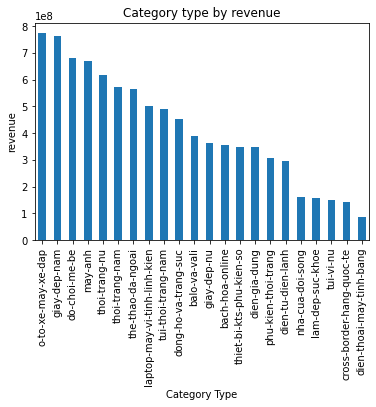

In [30]:
x.plot(kind='bar')
plt.xlabel('Category Type')
plt.ylabel('revenue')
plt.title('Category type by revenue')

# Loại hàng hóa được khách hàng đánh giá tốt nhất

In [31]:
x=df.groupby(['category_type']).mean()['rating_average'].sort_values(ascending=False)
x

category_type
laptop-may-vi-tinh-linh-kien    4.809375
do-choi-me-be                   4.802041
cross-border-hang-quoc-te       4.801282
bach-hoa-online                 4.795000
nha-cua-doi-song                4.784615
lam-dep-suc-khoe                4.772727
dien-thoai-may-tinh-bang        4.730000
thiet-bi-kts-phu-kien-so        4.705000
phu-kien-thoi-trang             4.700000
tui-thoi-trang-nam              4.697222
the-thao-da-ngoai               4.691379
tui-vi-nu                       4.670000
may-anh                         4.664407
giay-dep-nam                    4.649038
dien-gia-dung                   4.647059
dong-ho-va-trang-suc            4.646753
thoi-trang-nu                   4.643220
giay-dep-nu                     4.635294
balo-va-vali                    4.586111
dien-tu-dien-lanh               4.571642
thoi-trang-nam                  4.561538
o-to-xe-may-xe-dap              4.501333
Name: rating_average, dtype: float64

Text(0.5, 1.0, 'Category type by rating average')

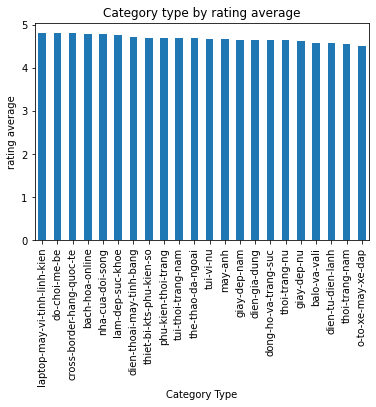

In [32]:
x.plot(kind='bar')
plt.xlabel('Category Type')
plt.ylabel('rating average')
plt.title('Category type by rating average')

# Giá thành của sản phẩm cao nhất của từng loại hàng hóa

In [33]:
x=df.groupby(['category_type']).max()['price'].sort_values(ascending=False)
x

category_type
laptop-may-vi-tinh-linh-kien    799000.0
tui-thoi-trang-nam              779000.0
cross-border-hang-quoc-te       750000.0
may-anh                         700000.0
thoi-trang-nam                  699999.0
dong-ho-va-trang-suc            699000.0
giay-dep-nu                     699000.0
dien-thoai-may-tinh-bang        696000.0
the-thao-da-ngoai               650000.0
balo-va-vali                    650000.0
do-choi-me-be                   630000.0
dien-tu-dien-lanh               599000.0
giay-dep-nam                    585000.0
nha-cua-doi-song                585000.0
dien-gia-dung                   550000.0
thoi-trang-nu                   515000.0
tui-vi-nu                       457000.0
bach-hoa-online                 376000.0
o-to-xe-may-xe-dap              368000.0
lam-dep-suc-khoe                352000.0
thiet-bi-kts-phu-kien-so        300000.0
phu-kien-thoi-trang             299000.0
Name: price, dtype: float64

Text(0.5, 1.0, 'Category type by max price')

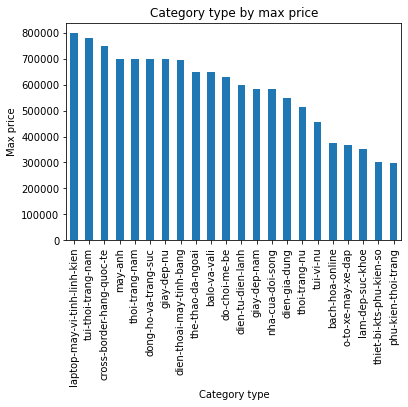

In [34]:
x.plot(kind='bar')
plt.xlabel('Category type')
plt.ylabel('Max price')
plt.title('Category type by max price')

# Loại hàng hóa bán được nhiều sản phẩm nhất

In [35]:
x=df.groupby(['category_type']).sum()['quantity_sold'].sort_values(ascending=False)
x

category_type
giay-dep-nam                    7450.0
o-to-xe-may-xe-dap              6830.0
do-choi-me-be                   6465.0
thoi-trang-nam                  5744.0
thoi-trang-nu                   4962.0
the-thao-da-ngoai               4836.0
may-anh                         4607.0
dong-ho-va-trang-suc            4008.0
tui-thoi-trang-nam              3894.0
laptop-may-vi-tinh-linh-kien    3684.0
thiet-bi-kts-phu-kien-so        3646.0
phu-kien-thoi-trang             3606.0
giay-dep-nu                     3231.0
dien-tu-dien-lanh               3222.0
bach-hoa-online                 3129.0
nha-cua-doi-song                1916.0
balo-va-vali                    1791.0
dien-gia-dung                   1644.0
tui-vi-nu                       1594.0
lam-dep-suc-khoe                 940.0
cross-border-hang-quoc-te        563.0
dien-thoai-may-tinh-bang         152.0
Name: quantity_sold, dtype: float64

Text(0.5, 1.0, 'Category type by quantity sold')

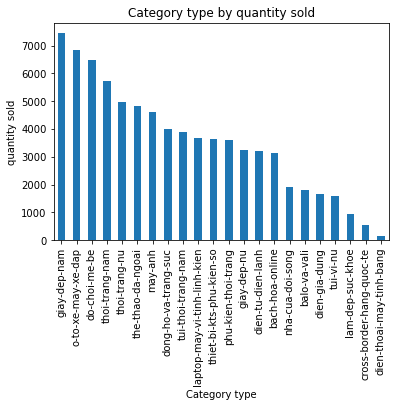

In [36]:
x.plot(kind='bar')
plt.xlabel('Category type')
plt.ylabel('quantity sold')
plt.title('Category type by quantity sold')

Text(0.5, 1.0, 'Category type by quantity sold')

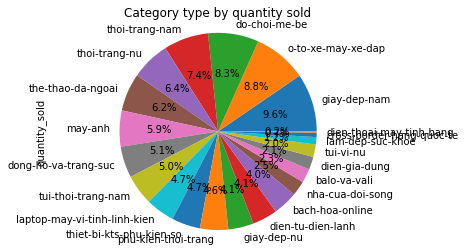

In [37]:
x.plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Category type by quantity sold')

# Sản phẩm đem về nguồn doanh thu cao nhất

In [38]:
x=df.groupby(['id']).sum()['revenue'].sort_values(ascending=False).head(10)
x

id
176037199.0    48960000.0
217266967.0    40188000.0
198087837.0    39858000.0
195153629.0    39828000.0
220820139.0    39810800.0
191143593.0    39515000.0
4688759.0      39468000.0
77917918.0     39432000.0
72680847.0     38735000.0
31847215.0     38610000.0
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Top 10 Product by revenue')

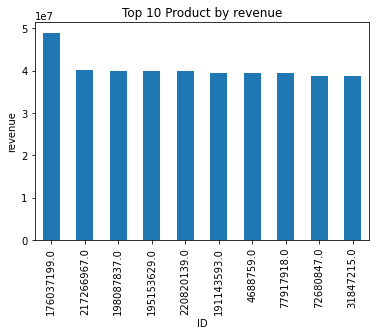

In [39]:
x.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('revenue')
plt.title('Top 10 Product by revenue')

# Sản phẩm bán được nhiều nhất(ID đại diện cho sản phẩm)

In [40]:
x=df.groupby(['id']).sum()['quantity_sold'].sort_values(ascending=False).head(10)
x

id
114285672.0    447.0
5950363.0      440.0
147400127.0    438.0
199709605.0    432.0
73251030.0     430.0
10762080.0     411.0
34623929.0     409.0
198454755.0    403.0
36935892.0     401.0
156634748.0    401.0
Name: quantity_sold, dtype: float64

Text(0.5, 1.0, 'Top 10 Product by quantity sold')

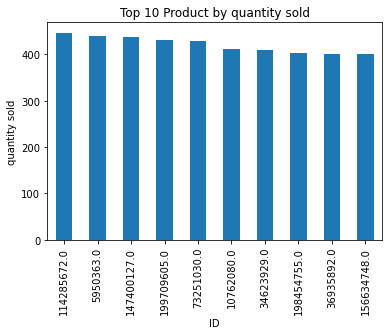

In [41]:
x.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('quantity sold')
plt.title('Top 10 Product by quantity sold')

# Sản phẩm được khách hàng yêu thích nhất

In [42]:
x=df.groupby(['id']).mean()['rating_average'].sort_values(ascending=False).head(10)
x

id
448842.0       5.0
157570327.0    5.0
159015474.0    5.0
160051494.0    5.0
160081373.0    5.0
160315233.0    5.0
160397677.0    5.0
160755335.0    5.0
160796434.0    5.0
160845877.0    5.0
Name: rating_average, dtype: float64

Text(0.5, 1.0, 'Top 10 Product by rating average')

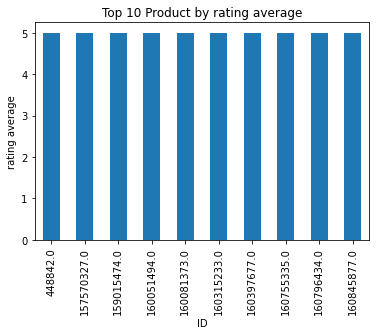

In [43]:
x.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('rating average')
plt.title('Top 10 Product by rating average')

# Sản phẩm được review nhiều nhất

In [44]:
x=df.groupby(['id']).sum()['review_count'].sort_values(ascending=False).head(10)
x

id
72513159.0     153.0
2850247.0      133.0
97057130.0     113.0
34623929.0     112.0
50347611.0     111.0
199709605.0    106.0
147400127.0    102.0
114285672.0    101.0
169277360.0     95.0
5950363.0       95.0
Name: review_count, dtype: float64

Text(0.5, 1.0, 'product by review count')

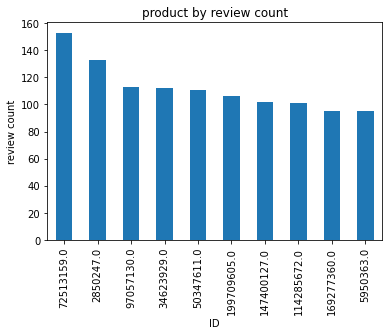

In [45]:
x.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('review count')
plt.title('product by review count')

In [46]:
df=df.drop(['brand_name','category_type'],axis=1)

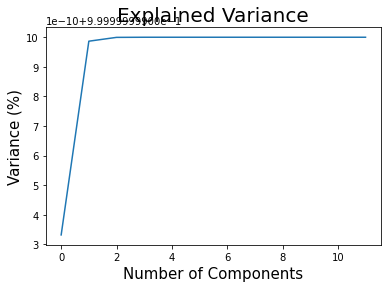

In [47]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA().fit(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

plt.show()

In [48]:
pca = PCA(n_components=3).fit(df)
pca_dataset = pca.transform(df)

# Lưu trữ dữ liệu thu được trong dataframe mới
pca_dataset= pd.DataFrame(data = pca_dataset, index = df.index)
pca_dataset

,0,1,2
0,-3.863950e+12,7.172356e+07,1.193115e+07
1,2.553913e+12,5.639918e+06,1.013884e+07
2,-3.228844e+11,-8.905793e+07,2.510570e+07
3,-3.546532e+12,4.432527e+07,2.146921e+06
4,2.722346e+12,-6.901197e+07,2.186543e+07
...,...,...,...
1208,-6.894109e+11,1.189211e+08,-9.727932e+06
1209,2.184587e+12,1.235013e+08,-4.706194e+06
1210,1.886059e+12,6.900157e+06,-6.743130e+06
1211,-1.005359e+12,-1.189876e+07,-1.572539e+06


C:\Users\ACER\AppData\Local\Temp\ipykernel_12144\954689086.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


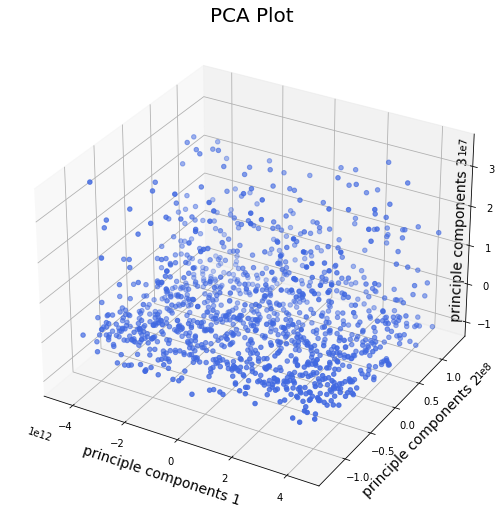

In [49]:
fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')
x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])
ax.scatter(x, y, z, c='royalBlue', marker='o')

ax.set_title('PCA Plot', fontdict={'fontsize': 20})
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
fig.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [51]:
import warnings
warnings.filterwarnings('ignore')
num_of_clusters = 10
k_means_score = pd.DataFrame(columns = range(2,num_of_clusters), index = ['sil_score'])

for k in range(2, num_of_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    k_means_score[k] = sil_score
k_means_score

,2,3,4,5,6,7,8,9
sil_score,0.637094,0.592807,0.578676,0.573647,0.571982,0.554376,0.559886,0.554186


In [52]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

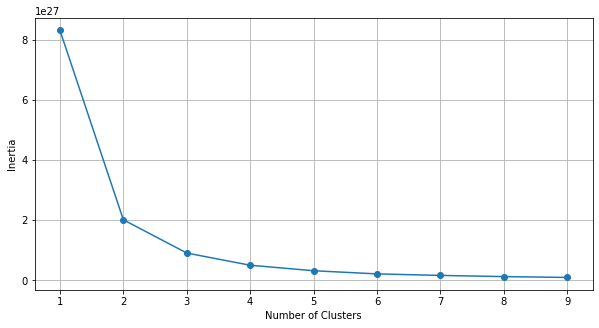

In [53]:
optimise_k_means(df,10)

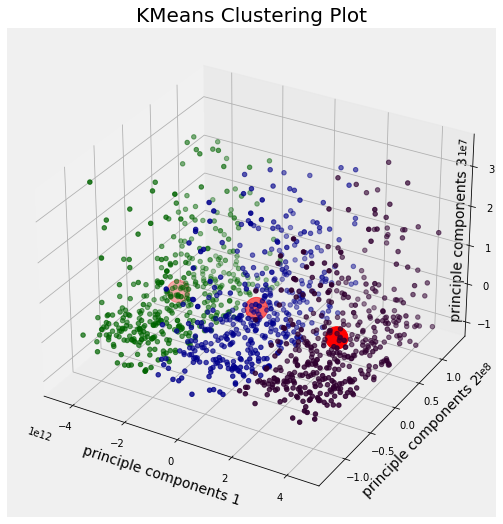

In [54]:
#Từ đồ thị ta chọn được n_clusters=3
kmeans = KMeans(n_clusters= 3, random_state=100).fit(pca_dataset)
    

cluster_centers = kmeans.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]
C3 = cluster_centers[:, 2]


fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')

x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])

cmap = plt.cm.colors.ListedColormap(['#300030', '#00008b', '#006400'])
ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap=cmap)
ax.scatter(C1, C2, C3, color = 'red', s=500)

ax.set_facecolor('#f0f0f0')
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
ax.set_title('KMeans Clustering Plot', fontdict={'fontsize': 20})

plt.show()

In [55]:
y=df['price']
X=df.drop(['price'],axis=1)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print("Regression Report:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)

In [59]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=2023)
decision_tree.fit(X_train, y_train)
y_pred_tree=decision_tree.predict(X_test)
regression_report(y_test, y_pred_tree)

Regression Report:
Mean Absolute Error (MAE): 6422.18956043956
Mean Squared Error (MSE): 228091151.6510989
Root Mean Squared Error (RMSE): 15102.686901710533
R-squared (R^2): 0.9887278230834738


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)
y_pred_forest=rf.predict(X_test)
regression_report(y_test, y_pred_forest)

Regression Report:
Mean Absolute Error (MAE): 4285.515302197802
Mean Squared Error (MSE): 115660742.29773597
Root Mean Squared Error (RMSE): 10754.568438470043
R-squared (R^2): 0.9942840906364


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2023)
gbm.fit(X_train, y_train)
y_pred_gbm=gbm.predict(X_test)
regression_report(y_test, y_pred_gbm)

Regression Report:
Mean Absolute Error (MAE): 3382.282146018447
Mean Squared Error (MSE): 44409764.253019445
Root Mean Squared Error (RMSE): 6664.065144716057
R-squared (R^2): 0.9978052865450607


In [62]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
regression_report(y_test, y_pred_knn)

Regression Report:
Mean Absolute Error (MAE): 33356.931318681316
Mean Squared Error (MSE): 2110985093.4722223
Root Mean Squared Error (RMSE): 45945.4578111071
R-squared (R^2): 0.895675929252323


In [63]:
from sklearn.model_selection import KFold, cross_val_score


seed = 1000
def generate_baseline_results(models, X, y, metrics, cv=3, plot_results=False):
    # define k-fold:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # sort by accuracy
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)

    return baseline_results

models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=k)
]

baseline_results = generate_baseline_results(models, X, y, metrics='r2', cv=3, plot_results=False)
print(baseline_results)


                               Mean  Standard Deviation
model_name                                             
GradientBoostingRegressor  0.998276            0.000360
RandomForestRegressor      0.995626            0.001190
DecisionTreeRegressor      0.993553            0.001954
KNeighborsRegressor        0.899648            0.006596


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [65]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(11, 5)
        self.layer2 = nn.Linear(5, 4)
        self.out = nn.Linear(4, 1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x

net = Net()

In [66]:
torch_X_train = torch.tensor(X_train).type(torch.float32)
torch_y_train = torch.tensor(y_train.values).type(torch.float32)

torch_X_test = torch.tensor(X_test).type(torch.float32)
torch_y_test = torch.tensor(y_test.values).type(torch.float32)


In [67]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [68]:
for x, target in zip(torch_X_train, torch_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

In [69]:
total_loss = 0
for x, target in zip(torch_X_test, torch_y_test):
    output = net(x)
    loss = criterion(output, target)
    total_loss += loss

avg_loss = total_loss / len(torch_X_test)

In [70]:
torch_rmse = torch.sqrt(avg_loss).detach().numpy()

In [71]:
print("PyTorch RMSE:", torch_rmse)

PyTorch RMSE: 199306.27
